# Spiral Experiment

We will perform the sphere reconstruction process with spiral data-generating process

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..'))

import torch

from data.generation import SpiralRotation, Patches
from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere
from encoders import SphericalEncoder

from encoders import get_mlp

import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using', device)

Using cuda


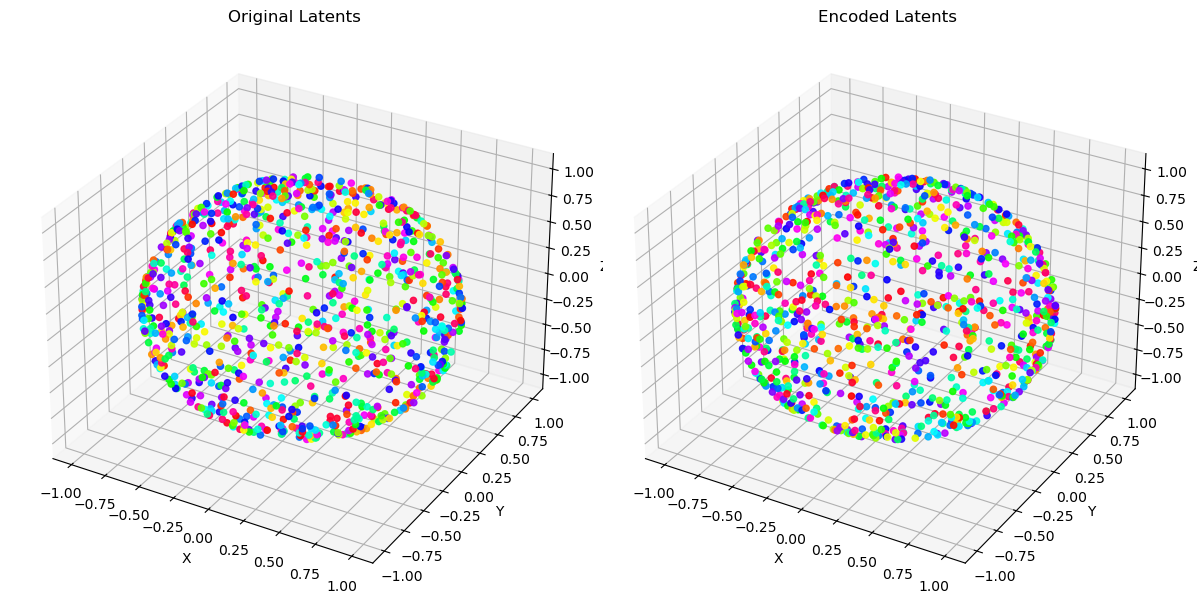

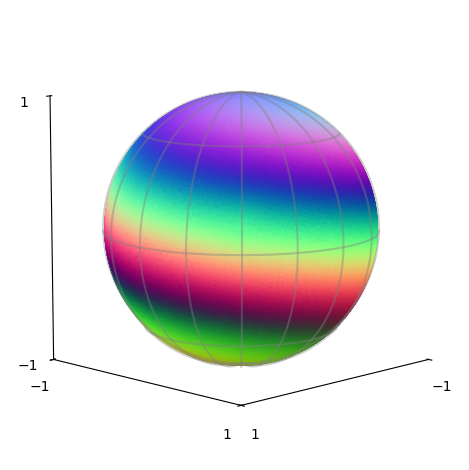

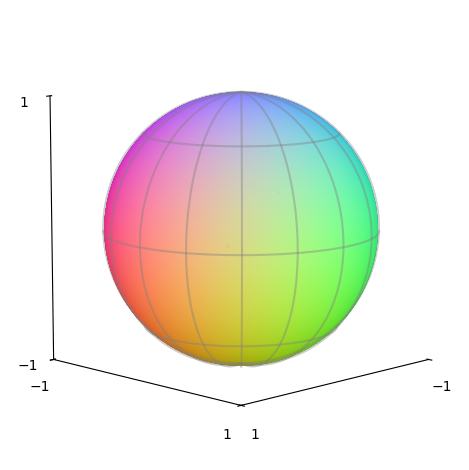

In [2]:
sphere = NSphereSpace(3)
g_spiral = SpiralRotation(2)

z = sphere.uniform(1000)

visualize_spheres_side_by_side(plt, z, g_spiral(z))

z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g_spiral(z), s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10, a=.8)

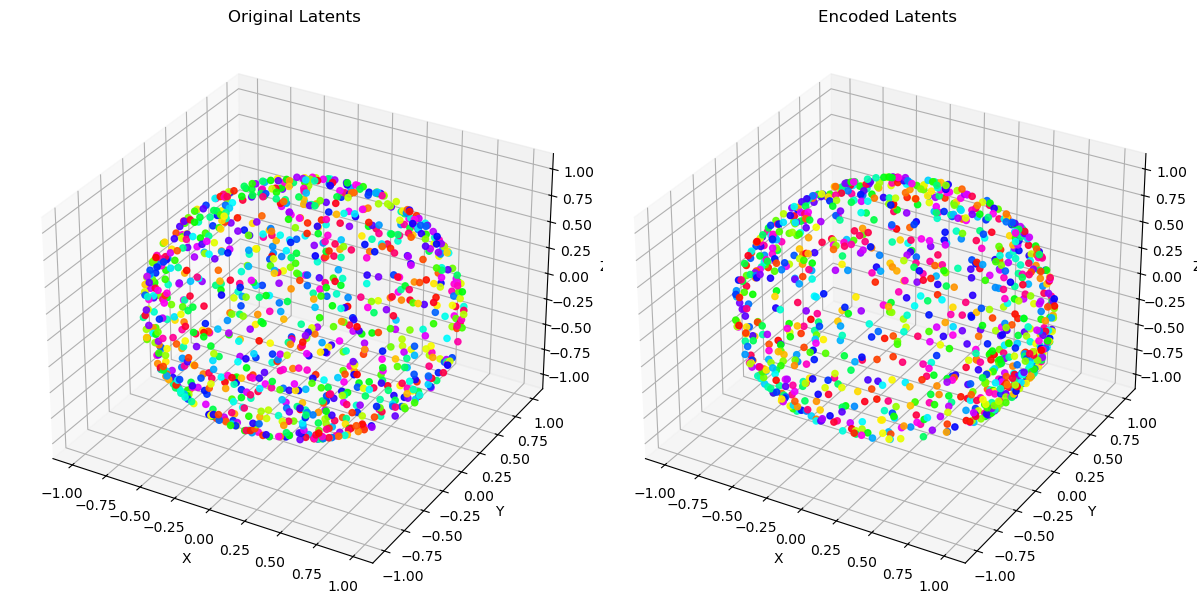

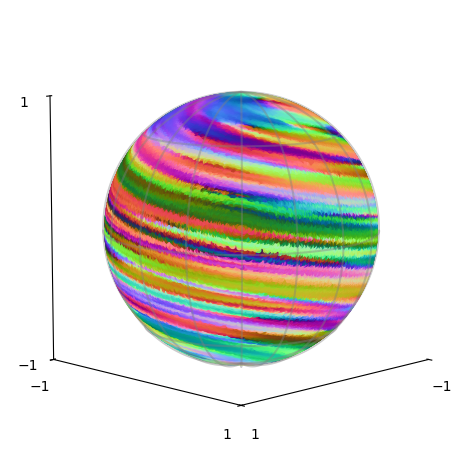

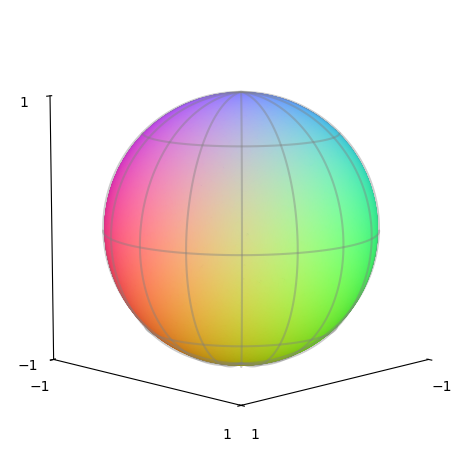

In [3]:
tau = 0.3
kappa = 1 / tau

iterations = 10000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

f = SphericalEncoder(hidden_dims=[128, 256, 256, 256, 256, 256, 256, 128])

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

z = sphere.uniform(100000).to(device)
z_enc = h(z.cpu())

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.661975860595703 Samples processed: 1 linear disentanglement: 0.1411922723054886 permutation disentanglement: 0.020439067855477333 angle_preservation_error: 0.3037917912006378
Loss: 7.970493316650391 Samples processed: 21 linear disentanglement: 0.9326426386833191 permutation disentanglement: 0.029646912589669228 angle_preservation_error: 0.08477699011564255
Loss: 7.850147247314453 Samples processed: 41 linear disentanglement: 0.9890530705451965 permutation disentanglement: 0.03281233832240105 angle_preservation_error: 0.034189458936452866
Loss: 7.816464900970459 Samples processed: 61 linear disentanglement: 0.9943706393241882 permutation disentanglement: 0.03340339660644531 angle_preservation_error: 0.024625159800052643
Loss: 7.803481101989746 Samples processed: 81 linear disentanglement: 0.9946934580802917 permutation disentanglement: 0.035039663314819336 angle_preservation_error: 0.02267959713935852
Loss: 7.827755928039

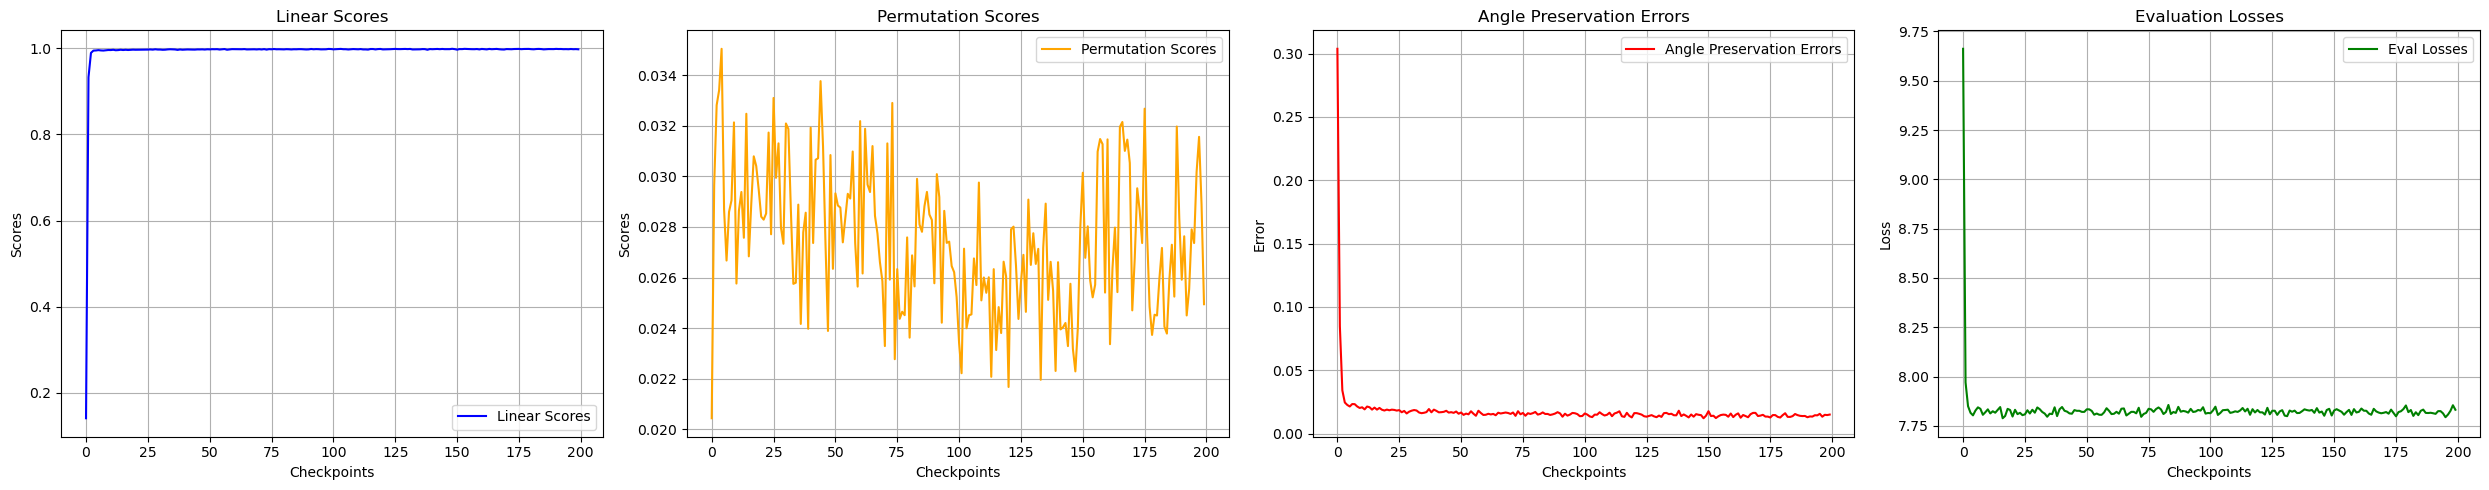

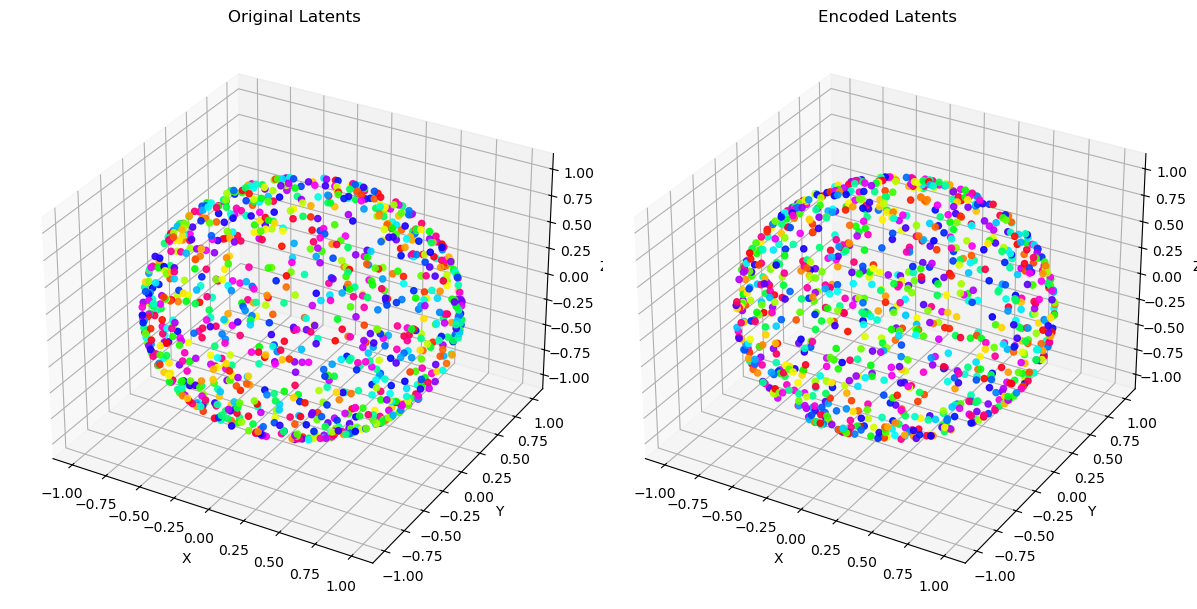

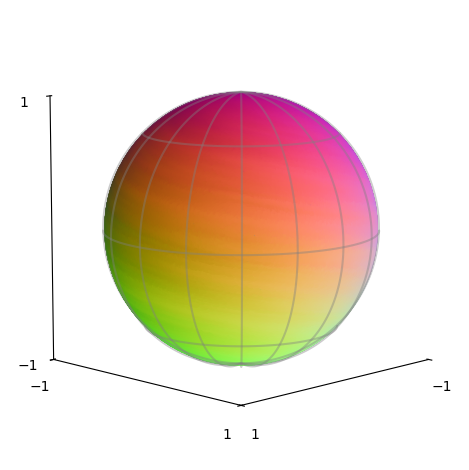

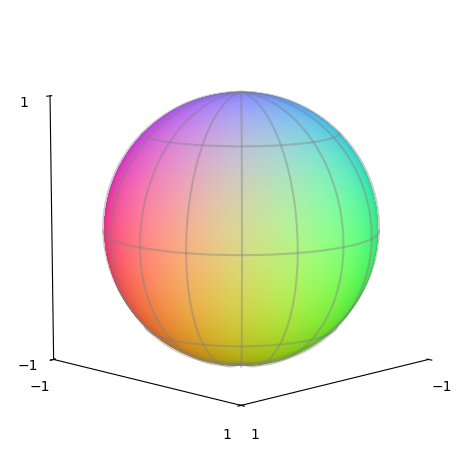

In [4]:
from visualization_utils.scoring import plot_scores

iterations = 4000

simclr_vmf = SimCLR(
    f, g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

Linear control score: 1.0
Permutation control score: 0.9999999999999997
Loss: 7.822644233703613 Samples processed: 1 linear disentanglement: 0.9960508942604065 permutation disentanglement: 0.028035541996359825 angle_preservation_error: 0.01823432184755802
Loss: 7.821956634521484 Samples processed: 21 linear disentanglement: 0.9973752498626709 permutation disentanglement: 0.03252984955906868 angle_preservation_error: 0.015620142221450806
Loss: 7.833366394042969 Samples processed: 41 linear disentanglement: 0.9978201985359192 permutation disentanglement: 0.0285580363124609 angle_preservation_error: 0.014212029054760933
Loss: 7.8087615966796875 Samples processed: 61 linear disentanglement: 0.9975497126579285 permutation disentanglement: 0.030850470066070557 angle_preservation_error: 0.014778347685933113
Loss: 7.795361518859863 Samples processed: 81 linear disentanglement: 0.9972346425056458 permutation disentanglement: 0.02758546732366085 angle_preservation_error: 0.01639886014163494
Loss

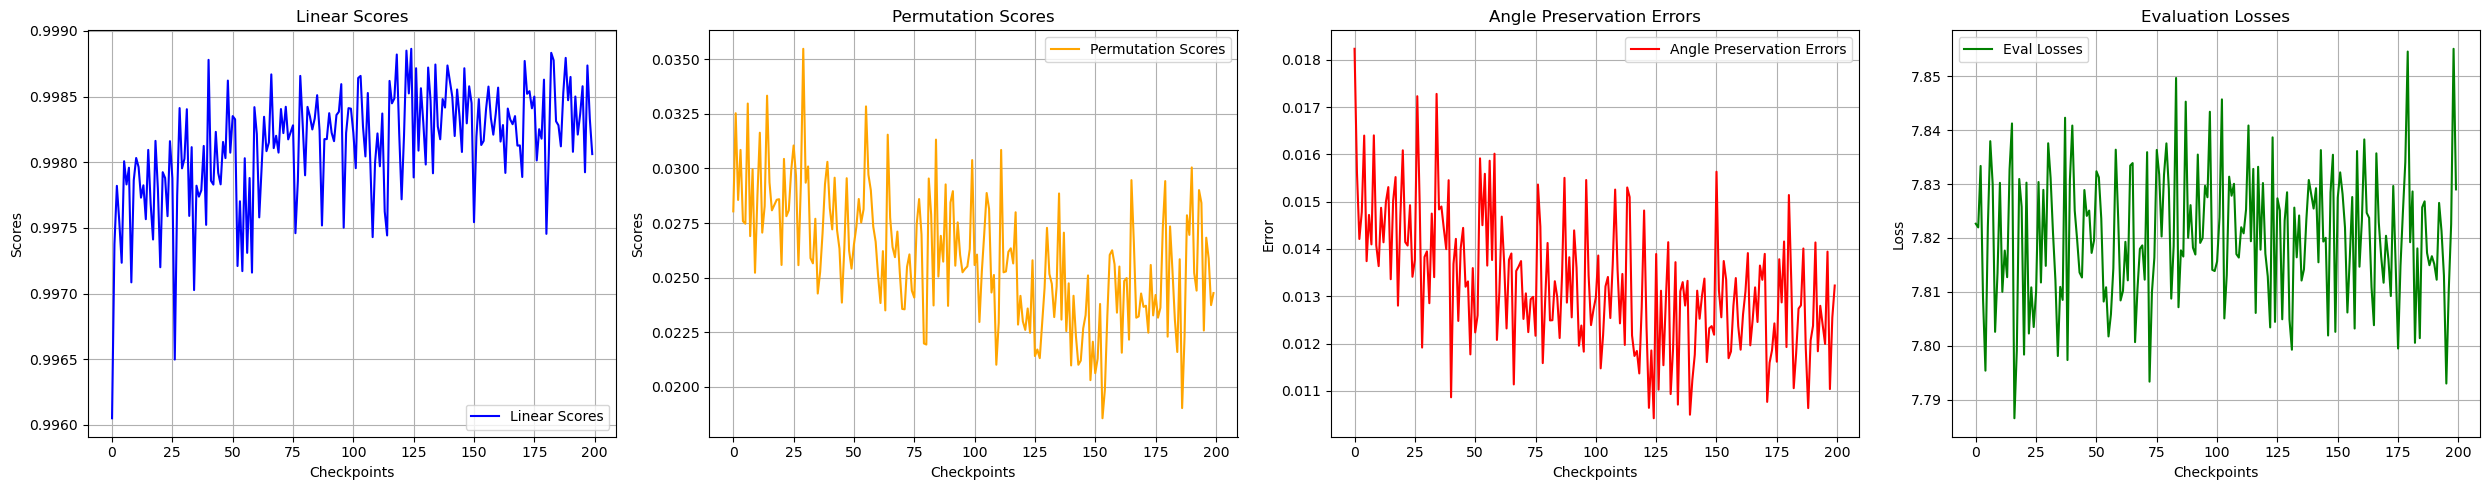

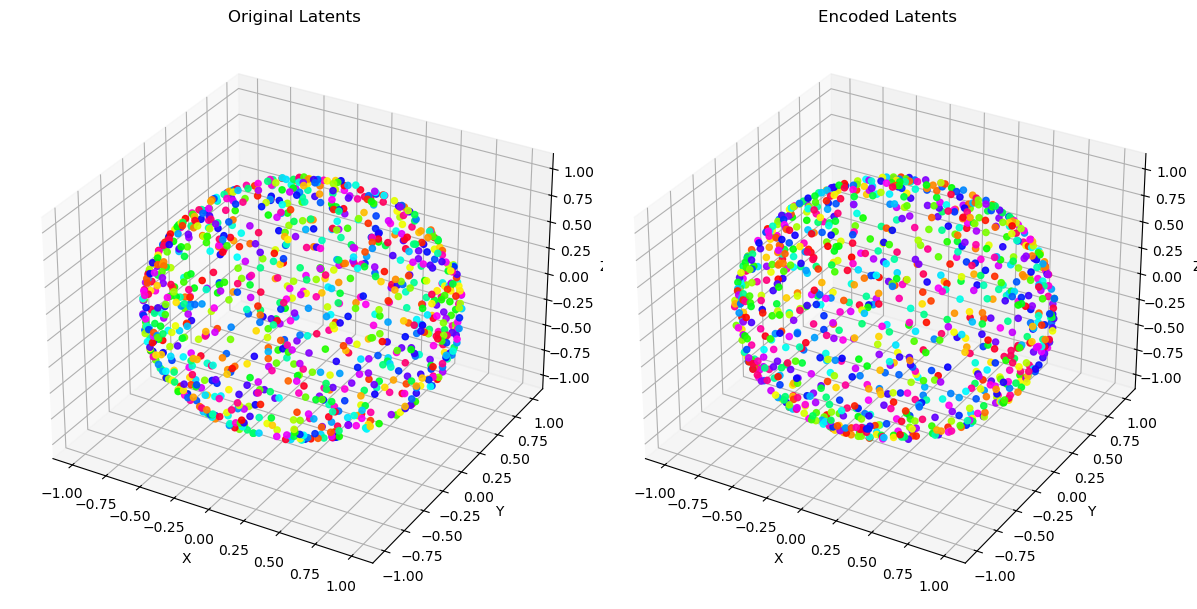

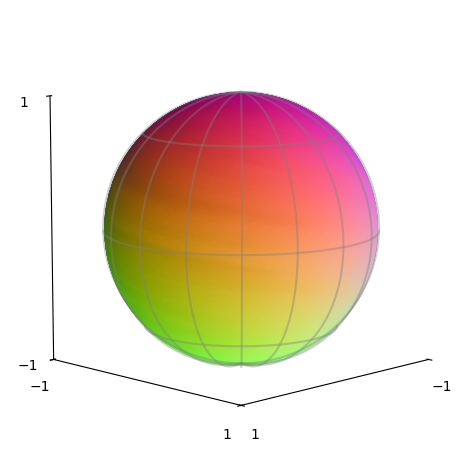

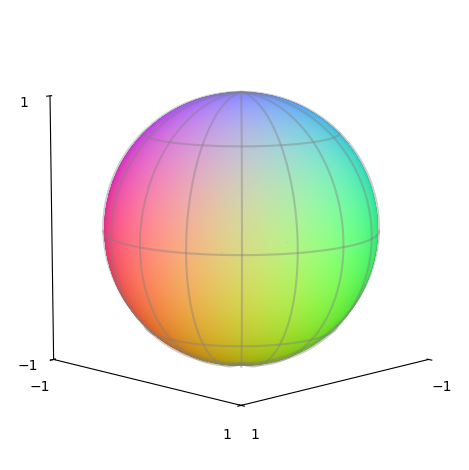

In [5]:
from torch import nn
from encoders import InverseSpiralEncoder


simclr_biased = SimCLR(
    InverseSpiralEncoder(3, 3, 2), g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)